Model building in Scikit-learn
Let's build the diabetes prediction model.

Here, you are going to predict diabetes using Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. 

In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("Logistic Dataset\pima-indians-diabetes-new.csv", header=None, names=col_names)

In [2]:
print(pima.head())
print(pima.shape)

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
(768, 9)


Selecting Feature
Here, you need to divide the given columns into two types of variables dependent
(or target variable) and independent variable(or feature variables).

In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [5]:
X.shape

(768, 7)

In [6]:
y.shape

(768,)

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score

#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
y_train.shape


(576,)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [9]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
661,1,0,42.9,22,199,76,1.394
122,2,100,33.6,23,107,74,0.404
113,4,0,34.0,25,76,62,0.391
14,5,175,25.8,51,166,72,0.587
529,0,0,24.6,31,111,65,0.660
...,...,...,...,...,...,...,...
366,6,0,27.6,29,124,72,0.368
301,2,135,31.6,25,144,58,0.422
382,1,182,25.4,21,109,60,0.947
140,3,0,21.1,55,128,78,0.268


In [10]:
# import the class

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()


# fit the model with data
logreg.fit(X_train,y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
LogisticRegression(

SyntaxError: unexpected EOF while parsing (<ipython-input-12-3dc236982592>, line 1)

In [13]:
#
y_pred=logreg.predict(X_test)

In [14]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [15]:
y_pred.shape

(192,)

In [16]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: label, Length: 192, dtype: int64

In [18]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

In [19]:
 #import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


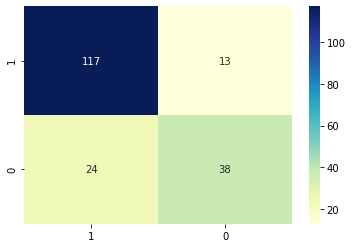

In [20]:
#class_names=[0,1] # name  of classes
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
#tick_marks = np.arange(len(class_names))
tick_marks = np.array(class_names)

#plt.xticks(tick_marks)
#plt.yticks(tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',xticklabels=tick_marks,yticklabels=tick_marks)
ax.xaxis.set_label_position("top")

Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8072916666666666


In [22]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: label, Length: 192, dtype: int64

In [24]:
#y_test.columns=['TradeDate','TradeTime']

In [25]:
type(y_test)

pandas.core.series.Series

In [26]:
#y_test['newcol'] = y_pred
#print(y_test)

In [27]:
ytest_ypred= pd.DataFrame({'srno':y_test.index, 'y_test':y_test.values})

In [28]:
ytest_ypred['y_pred'] = y_pred
print(y_test)

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: label, Length: 192, dtype: int64


In [29]:
ytest_ypred


,srno,y_test,y_pred
0,661,1,1
1,122,0,0
2,113,0,0
3,14,1,1
4,529,0,0
...,...,...,...
187,366,1,0
188,301,1,0
189,382,0,0
190,140,0,0
